# Figure 05
## FOXSI3 Instrumentation Milo's paper
https://v2.overleaf.com/read/wcfwdbgdfgcc
### November 2018
### Milo BC @ UC Berkeley

### Goal:

<div class="alert alert-info">
Another plot show ghost rays as a function of the size of front and rear blockers.
<div/>

### Front blocker dependance 10-shell module:

In [1]:
from foxsisim.util import load_rays
from foxsisim.detector import Detector
import matplotlib.pyplot as plt 
import matplotlib.patches as patches
import numpy as np
import seaborn as sns
sns.set_style('white')
sns.set_context('talk')

### Front = 2.86cm , No rear

In [2]:
fbr = 2.8575
rbr = 0.00
offaxisAngles = np.arange(0.0,30.,2.) # Off-Axis Angles


F286_NR_All_Drays, F286_NR_All_Hrays, F286_NR_All_Prays = [], [], []
F286_NR_All_Dx, F286_NR_All_Dy, F286_NR_All_Hx, F286_NR_All_Hy, F286_NR_All_Px, F286_NR_All_Py = [], [], [], [], [], []

for angle in offaxisAngles:
    # Loading Rays:
    Brays = load_rays('/Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F286R000/rays_Angle_=_'+str(angle)+'.csv')
    # Fix little bug in rays:
    for ray in Brays:
        ray.hist = ray.hist.tolist()
    # Create detector :
    detector = Detector(width=10,
                    height=10,
                    normal = [0,0,1],
                    center = [0,0,230],
                    reso = [1024,1024])
    # Detector Catch rays:
    detector.catchRays(Brays)
    
    '''Defining D, H, and P rays for each blocker size: '''
    Drays = [ray for ray in Brays if (ray.des[2]==230.0 and abs(ray.des[1])<= 0.48 and abs(ray.des[0])<= 0.48 and ray.bounces ==2 )]
    Srays = [ray for ray in Brays if (ray.des[2]==230.0 and abs(ray.des[1])<= 0.48 and abs(ray.des[0])<= 0.48 and ray.bounces ==1 )]
    Hrays = [ray for ray in Brays if (ray.des[2]==230.0 and abs(ray.des[1])<= 0.48 and abs(ray.des[0])<= 0.48 and ray.bounces ==1 and ray.tag[-4:] == 'Hy-D' )]
    Prays = [ray for ray in Brays if (ray.des[2]==230.0 and abs(ray.des[1])<= 0.48 and abs(ray.des[0])<= 0.48 and ray.bounces ==1 and ray.tag[-4:] == 'Pa-D' )]

    F286_NR_All_Drays.append(Drays)
    F286_NR_All_Hrays.append(Hrays)
    F286_NR_All_Prays.append(Prays)
    
    sim_scale = 1.0    # 1cm = 17.4 arcmin
    #sim_scale = 17.4    # 1cm = 17.4 arcmin

    #Hyperboloid
    Hx, Hy = [], []
    for ray in Hrays:
        Hx.append(ray.pos[0]*sim_scale)
        Hy.append(ray.pos[1]*sim_scale)
    F286_NR_All_Hx.append(Hx)
    F286_NR_All_Hy.append(Hy)
        
    # Paraboloid
    Px, Py = [], []
    for ray in Prays:
        Px.append(ray.pos[0]*sim_scale)
        Py.append(ray.pos[1]*sim_scale)
    F286_NR_All_Px.append(Px)
    F286_NR_All_Py.append(Py)
        
    # Double
    Dx, Dy = [], []
    for ray in Drays:
        Dx.append(ray.pos[0]*sim_scale)
        Dy.append(ray.pos[1]*sim_scale)
    F286_NR_All_Dx.append(Dx)
    F286_NR_All_Dy.append(Dy)  

Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F286R000/rays_Angle_=_0.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F286R000/rays_Angle_=_2.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F286R000/rays_Angle_=_4.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F286R000/rays_Angle_=_6.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F286R000/rays_Angle_=_8.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F286R000/rays_Angle_=_10.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F286R000/rays_Angle_=_12.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F286R000/rays_Angle_=_14.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/

In [3]:
Rout = 3.29
fbr = 2.8575
F286_NR_Doubles, F286_NR_Hyp, F286_NR_Par = [], [], []
for i, angles in enumerate(offaxisAngles):
    F286_NR_Doubles.append(len(F286_NR_All_Drays[i]) * (Rout**2 - fbr**2))
    F286_NR_Hyp.append(len(F286_NR_All_Hrays[i]) * (Rout**2 - fbr**2))
    F286_NR_Par.append(len(F286_NR_All_Prays[i]) * (Rout**2 - fbr**2))

### Front = 3.09cm , No rear

In [4]:
fbr = 3.09671
rbr = 0.00
offaxisAngles = np.arange(0.0,30.,2.) # Off-Axis Angles


F309_NR_All_Drays, F309_NR_All_Hrays, F309_NR_All_Prays = [], [], []
F309_NR_All_Dx, F309_NR_All_Dy, F309_NR_All_Hx, F309_NR_All_Hy, F309_NR_All_Px, F309_NR_All_Py = [], [], [], [], [], []

for angle in offaxisAngles:
    # Loading Rays:
    Brays = load_rays('/Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F309R000/rays_Angle_=_'+str(angle)+'.csv')
    # Fix little bug in rays:
    for ray in Brays:
        ray.hist = ray.hist.tolist()
    # Create detector :
    detector = Detector(width=10,
                    height=10,
                    normal = [0,0,1],
                    center = [0,0,230],
                    reso = [1024,1024])
    # Detector Catch rays:
    detector.catchRays(Brays)
    
    '''Defining D, H, and P rays for each blocker size: '''
    Drays = [ray for ray in Brays if (ray.des[2]==230.0 and abs(ray.des[1])<= 0.48 and abs(ray.des[0])<= 0.48 and ray.bounces ==2 )]
    Srays = [ray for ray in Brays if (ray.des[2]==230.0 and abs(ray.des[1])<= 0.48 and abs(ray.des[0])<= 0.48 and ray.bounces ==1 )]
    Hrays = [ray for ray in Brays if (ray.des[2]==230.0 and abs(ray.des[1])<= 0.48 and abs(ray.des[0])<= 0.48 and ray.bounces ==1 and ray.tag[-4:] == 'Hy-D' )]
    Prays = [ray for ray in Brays if (ray.des[2]==230.0 and abs(ray.des[1])<= 0.48 and abs(ray.des[0])<= 0.48 and ray.bounces ==1 and ray.tag[-4:] == 'Pa-D' )]

    F309_NR_All_Drays.append(Drays)
    F309_NR_All_Hrays.append(Hrays)
    F309_NR_All_Prays.append(Prays)
    
    sim_scale = 1.0    # 1cm = 17.4 arcmin
    #sim_scale = 17.4    # 1cm = 17.4 arcmin

    #Hyperboloid
    Hx, Hy = [], []
    for ray in Hrays:
        Hx.append(ray.pos[0]*sim_scale)
        Hy.append(ray.pos[1]*sim_scale)
    F309_NR_All_Hx.append(Hx)
    F309_NR_All_Hy.append(Hy)
        
    # Paraboloid
    Px, Py = [], []
    for ray in Prays:
        Px.append(ray.pos[0]*sim_scale)
        Py.append(ray.pos[1]*sim_scale)
    F309_NR_All_Px.append(Px)
    F309_NR_All_Py.append(Py)
        
    # Double
    Dx, Dy = [], []
    for ray in Drays:
        Dx.append(ray.pos[0]*sim_scale)
        Dy.append(ray.pos[1]*sim_scale)
    F309_NR_All_Dx.append(Dx)
    F309_NR_All_Dy.append(Dy)
    

Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F309R000/rays_Angle_=_0.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F309R000/rays_Angle_=_2.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F309R000/rays_Angle_=_4.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F309R000/rays_Angle_=_6.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F309R000/rays_Angle_=_8.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F309R000/rays_Angle_=_10.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F309R000/rays_Angle_=_12.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F309R000/rays_Angle_=_14.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/

In [5]:
Rout = 3.29
fbr = 3.09671
F309_NR_Doubles, F309_NR_Hyp, F309_NR_Par = [], [], []
for i, angles in enumerate(offaxisAngles):
    F309_NR_Doubles.append(len(F309_NR_All_Drays[i]) * (Rout**2 - fbr**2))
    F309_NR_Hyp.append(len(F309_NR_All_Hrays[i]) * (Rout**2 - fbr**2))
    F309_NR_Par.append(len(F309_NR_All_Prays[i]) * (Rout**2 - fbr**2))

### Front = 3.1334cm , No rear

In [6]:
fbr = 3.1334
rbr = 0.00
offaxisAngles = np.arange(0.0,30.,2.) # Off-Axis Angles


F313_NR_All_Drays, F313_NR_All_Hrays, F313_NR_All_Prays = [], [], []
F313_NR_All_Dx, F313_NR_All_Dy, F313_NR_All_Hx, F313_NR_All_Hy, F313_NR_All_Px, F313_NR_All_Py = [], [], [], [], [], []

for angle in offaxisAngles:
    # Loading Rays:
    Brays = load_rays('/Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F313R000/rays_Angle_=_'+str(angle)+'.csv')
    # Fix little bug in rays:
    for ray in Brays:
        ray.hist = ray.hist.tolist()
    # Create detector :
    detector = Detector(width=10,
                    height=10,
                    normal = [0,0,1],
                    center = [0,0,230],
                    reso = [1024,1024])
    # Detector Catch rays:
    detector.catchRays(Brays)
    
    '''Defining D, H, and P rays for each blocker size: '''
    Drays = [ray for ray in Brays if (ray.des[2]==230.0 and abs(ray.des[1])<= 0.48 and abs(ray.des[0])<= 0.48 and ray.bounces ==2 )]
    Srays = [ray for ray in Brays if (ray.des[2]==230.0 and abs(ray.des[1])<= 0.48 and abs(ray.des[0])<= 0.48 and ray.bounces ==1 )]
    Hrays = [ray for ray in Brays if (ray.des[2]==230.0 and abs(ray.des[1])<= 0.48 and abs(ray.des[0])<= 0.48 and ray.bounces ==1 and ray.tag[-4:] == 'Hy-D' )]
    Prays = [ray for ray in Brays if (ray.des[2]==230.0 and abs(ray.des[1])<= 0.48 and abs(ray.des[0])<= 0.48 and ray.bounces ==1 and ray.tag[-4:] == 'Pa-D' )]

    F313_NR_All_Drays.append(Drays)
    F313_NR_All_Hrays.append(Hrays)
    F313_NR_All_Prays.append(Prays)
    
    sim_scale = 1.0    # 1cm = 17.4 arcmin
    #sim_scale = 17.4    # 1cm = 17.4 arcmin

    #Hyperboloid
    Hx, Hy = [], []
    for ray in Hrays:
        Hx.append(ray.pos[0]*sim_scale)
        Hy.append(ray.pos[1]*sim_scale)
    F313_NR_All_Hx.append(Hx)
    F313_NR_All_Hy.append(Hy)
        
    # Paraboloid
    Px, Py = [], []
    for ray in Prays:
        Px.append(ray.pos[0]*sim_scale)
        Py.append(ray.pos[1]*sim_scale)
    F313_NR_All_Px.append(Px)
    F313_NR_All_Py.append(Py)
        
    # Double
    Dx, Dy = [], []
    for ray in Drays:
        Dx.append(ray.pos[0]*sim_scale)
        Dy.append(ray.pos[1]*sim_scale)
    F313_NR_All_Dx.append(Dx)
    F313_NR_All_Dy.append(Dy)
    

Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F313R000/rays_Angle_=_0.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F313R000/rays_Angle_=_2.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F313R000/rays_Angle_=_4.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F313R000/rays_Angle_=_6.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F313R000/rays_Angle_=_8.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F313R000/rays_Angle_=_10.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F313R000/rays_Angle_=_12.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F313R000/rays_Angle_=_14.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/

In [7]:
Rout = 3.29
fbr = 3.1334
F313_NR_Doubles, F313_NR_Hyp, F313_NR_Par = [], [], []
for i, angles in enumerate(offaxisAngles):
    F313_NR_Doubles.append(len(F313_NR_All_Drays[i]) * (Rout**2 - fbr**2))
    F313_NR_Hyp.append(len(F313_NR_All_Hrays[i]) * (Rout**2 - fbr**2))
    F313_NR_Par.append(len(F313_NR_All_Prays[i]) * (Rout**2 - fbr**2))

### Front = 3.17cm , No rear

In [8]:
fbr = 3.17
rbr = 0.00
offaxisAngles = np.arange(0.0,30.,2.) # Off-Axis Angles


F317_NR_All_Drays, F317_NR_All_Hrays, F317_NR_All_Prays = [], [], []
F317_NR_All_Dx, F317_NR_All_Dy, F317_NR_All_Hx, F317_NR_All_Hy, F317_NR_All_Px, F317_NR_All_Py = [], [], [], [], [], []

for angle in offaxisAngles:
    # Loading Rays:
    Brays = load_rays('/Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F317R000/rays_Angle_=_'+str(angle)+'.csv')
    # Fix little bug in rays:
    for ray in Brays:
        ray.hist = ray.hist.tolist()
    # Create detector :
    detector = Detector(width=10,
                    height=10,
                    normal = [0,0,1],
                    center = [0,0,230],
                    reso = [1024,1024])
    # Detector Catch rays:
    detector.catchRays(Brays)
    
    '''Defining D, H, and P rays for each blocker size: '''
    Drays = [ray for ray in Brays if (ray.des[2]==230.0 and abs(ray.des[1])<= 0.48 and abs(ray.des[0])<= 0.48 and ray.bounces ==2 )]
    Srays = [ray for ray in Brays if (ray.des[2]==230.0 and abs(ray.des[1])<= 0.48 and abs(ray.des[0])<= 0.48 and ray.bounces ==1 )]
    Hrays = [ray for ray in Brays if (ray.des[2]==230.0 and abs(ray.des[1])<= 0.48 and abs(ray.des[0])<= 0.48 and ray.bounces ==1 and ray.tag[-4:] == 'Hy-D' )]
    Prays = [ray for ray in Brays if (ray.des[2]==230.0 and abs(ray.des[1])<= 0.48 and abs(ray.des[0])<= 0.48 and ray.bounces ==1 and ray.tag[-4:] == 'Pa-D' )]

    F317_NR_All_Drays.append(Drays)
    F317_NR_All_Hrays.append(Hrays)
    F317_NR_All_Prays.append(Prays)
    
    sim_scale = 1.0    # 1cm = 17.4 arcmin
    #sim_scale = 17.4    # 1cm = 17.4 arcmin

    #Hyperboloid
    Hx, Hy = [], []
    for ray in Hrays:
        Hx.append(ray.pos[0]*sim_scale)
        Hy.append(ray.pos[1]*sim_scale)
    F317_NR_All_Hx.append(Hx)
    F317_NR_All_Hy.append(Hy)
        
    # Paraboloid
    Px, Py = [], []
    for ray in Prays:
        Px.append(ray.pos[0]*sim_scale)
        Py.append(ray.pos[1]*sim_scale)
    F317_NR_All_Px.append(Px)
    F317_NR_All_Py.append(Py)
        
    # Double
    Dx, Dy = [], []
    for ray in Drays:
        Dx.append(ray.pos[0]*sim_scale)
        Dy.append(ray.pos[1]*sim_scale)
    F317_NR_All_Dx.append(Dx)
    F317_NR_All_Dy.append(Dy)
    

Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F317R000/rays_Angle_=_0.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F317R000/rays_Angle_=_2.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F317R000/rays_Angle_=_4.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F317R000/rays_Angle_=_6.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F317R000/rays_Angle_=_8.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F317R000/rays_Angle_=_10.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F317R000/rays_Angle_=_12.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F317R000/rays_Angle_=_14.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/

In [9]:
Rout = 3.29
fbr = 3.17
F317_NR_Doubles, F317_NR_Hyp, F317_NR_Par = [], [], []
for i, angles in enumerate(offaxisAngles):
    F317_NR_Doubles.append(len(F317_NR_All_Drays[i]) * (Rout**2 - fbr**2))
    F317_NR_Hyp.append(len(F317_NR_All_Hrays[i]) * (Rout**2 - fbr**2))
    F317_NR_Par.append(len(F317_NR_All_Prays[i]) * (Rout**2 - fbr**2))

# Rear blocker dependance

## F = 3.09cm & R=2.62cm

In [10]:
fbr = 3.09671
rbr = 2.62
offaxisAngles = np.arange(0.0,30.,2.) # Off-Axis Angles


F309_R262_All_Drays, F309_R262_All_Hrays, F309_R262_All_Prays = [], [], []
F309_R262_All_Dx, F309_R262_All_Dy, F309_R262_All_Hx, F309_R262_All_Hy, F309_R262_All_Px, F309_R262_All_Py = [], [], [], [], [], []

for angle in offaxisAngles:
    # Loading Rays:
    Brays = load_rays('/Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F309R262/rays_Angle_=_'+str(angle)+'.csv')
    # Fix little bug in rays:
    for ray in Brays:
        ray.hist = ray.hist.tolist()
    # Create detector :
    detector = Detector(width=10,
                    height=10,
                    normal = [0,0,1],
                    center = [0,0,230],
                    reso = [1024,1024])
    # Detector Catch rays:
    detector.catchRays(Brays)
    
    '''Defining D, H, and P rays for each blocker size: '''
    Drays = [ray for ray in Brays if (ray.des[2]==230.0 and abs(ray.des[1])<= 0.48 and abs(ray.des[0])<= 0.48 and ray.bounces ==2 )]
    Srays = [ray for ray in Brays if (ray.des[2]==230.0 and abs(ray.des[1])<= 0.48 and abs(ray.des[0])<= 0.48 and ray.bounces ==1 )]
    Hrays = [ray for ray in Brays if (ray.des[2]==230.0 and abs(ray.des[1])<= 0.48 and abs(ray.des[0])<= 0.48 and ray.bounces ==1 and ray.tag[-4:] == 'Hy-D' )]
    Prays = [ray for ray in Brays if (ray.des[2]==230.0 and abs(ray.des[1])<= 0.48 and abs(ray.des[0])<= 0.48 and ray.bounces ==1 and ray.tag[-4:] == 'Pa-D' )]

    F309_R262_All_Drays.append(Drays)
    F309_R262_All_Hrays.append(Hrays)
    F309_R262_All_Prays.append(Prays)
    
    sim_scale = 1.0    # 1cm = 17.4 arcmin
    #sim_scale = 17.4    # 1cm = 17.4 arcmin

    #Hyperboloid
    Hx, Hy = [], []
    for ray in Hrays:
        Hx.append(ray.pos[0]*sim_scale)
        Hy.append(ray.pos[1]*sim_scale)
    F309_R262_All_Hx.append(Hx)
    F309_R262_All_Hy.append(Hy)
        
    # Paraboloid
    Px, Py = [], []
    for ray in Prays:
        Px.append(ray.pos[0]*sim_scale)
        Py.append(ray.pos[1]*sim_scale)
    F309_R262_All_Px.append(Px)
    F309_R262_All_Py.append(Py)
        
    # Double
    Dx, Dy = [], []
    for ray in Drays:
        Dx.append(ray.pos[0]*sim_scale)
        Dy.append(ray.pos[1]*sim_scale)
    F309_R262_All_Dx.append(Dx)
    F309_R262_All_Dy.append(Dy)
    

Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F309R262/rays_Angle_=_0.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F309R262/rays_Angle_=_2.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F309R262/rays_Angle_=_4.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F309R262/rays_Angle_=_6.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F309R262/rays_Angle_=_8.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F309R262/rays_Angle_=_10.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F309R262/rays_Angle_=_12.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F309R262/rays_Angle_=_14.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/

In [11]:
Rout = 3.29
fbr = 3.17
F309_R262_Doubles, F309_R262_Hyp, F309_R262_Par = [], [], []
for i, angles in enumerate(offaxisAngles):
    F309_R262_Doubles.append(len(F309_R262_All_Drays[i]) * (Rout**2 - fbr**2))
    F309_R262_Hyp.append(len(F309_R262_All_Hrays[i]) * (Rout**2 - fbr**2))
    F309_R262_Par.append(len(F309_R262_All_Prays[i]) * (Rout**2 - fbr**2))

## F = 3.09cm & R=2.64cm

In [12]:
fbr = 3.09671
rbr = 2.64
offaxisAngles = np.arange(0.0,30.,2.) # Off-Axis Angles


F309_R264_All_Drays, F309_R264_All_Hrays, F309_R264_All_Prays = [], [], []
F309_R264_All_Dx, F309_R264_All_Dy, F309_R264_All_Hx, F309_R264_All_Hy, F309_R264_All_Px, F309_R264_All_Py = [], [], [], [], [], []

for angle in offaxisAngles:
    # Loading Rays:
    Brays = load_rays('/Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F309R264/rays_Angle_=_'+str(angle)+'.csv')
    # Fix little bug in rays:
    for ray in Brays:
        ray.hist = ray.hist.tolist()
    # Create detector :
    detector = Detector(width=10,
                    height=10,
                    normal = [0,0,1],
                    center = [0,0,230],
                    reso = [1024,1024])
    # Detector Catch rays:
    detector.catchRays(Brays)
    
    '''Defining D, H, and P rays for each blocker size: '''
    Drays = [ray for ray in Brays if (ray.des[2]==230.0 and abs(ray.des[1])<= 0.48 and abs(ray.des[0])<= 0.48 and ray.bounces ==2 )]
    Srays = [ray for ray in Brays if (ray.des[2]==230.0 and abs(ray.des[1])<= 0.48 and abs(ray.des[0])<= 0.48 and ray.bounces ==1 )]
    Hrays = [ray for ray in Brays if (ray.des[2]==230.0 and abs(ray.des[1])<= 0.48 and abs(ray.des[0])<= 0.48 and ray.bounces ==1 and ray.tag[-4:] == 'Hy-D' )]
    Prays = [ray for ray in Brays if (ray.des[2]==230.0 and abs(ray.des[1])<= 0.48 and abs(ray.des[0])<= 0.48 and ray.bounces ==1 and ray.tag[-4:] == 'Pa-D' )]

    F309_R264_All_Drays.append(Drays)
    F309_R264_All_Hrays.append(Hrays)
    F309_R264_All_Prays.append(Prays)
    
    sim_scale = 1.0    # 1cm = 17.4 arcmin
    #sim_scale = 17.4    # 1cm = 17.4 arcmin

    #Hyperboloid
    Hx, Hy = [], []
    for ray in Hrays:
        Hx.append(ray.pos[0]*sim_scale)
        Hy.append(ray.pos[1]*sim_scale)
    F309_R264_All_Hx.append(Hx)
    F309_R264_All_Hy.append(Hy)
        
    # Paraboloid
    Px, Py = [], []
    for ray in Prays:
        Px.append(ray.pos[0]*sim_scale)
        Py.append(ray.pos[1]*sim_scale)
    F309_R264_All_Px.append(Px)
    F309_R264_All_Py.append(Py)
        
    # Double
    Dx, Dy = [], []
    for ray in Drays:
        Dx.append(ray.pos[0]*sim_scale)
        Dy.append(ray.pos[1]*sim_scale)
    F309_R264_All_Dx.append(Dx)
    F309_R264_All_Dy.append(Dy) 

Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F309R264/rays_Angle_=_0.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F309R264/rays_Angle_=_2.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F309R264/rays_Angle_=_4.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F309R264/rays_Angle_=_6.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F309R264/rays_Angle_=_8.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F309R264/rays_Angle_=_10.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F309R264/rays_Angle_=_12.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F309R264/rays_Angle_=_14.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/

In [13]:
Rout = 3.29
fbr = 3.17
F309_R264_Doubles, F309_R264_Hyp, F309_R264_Par = [], [], []
for i, angles in enumerate(offaxisAngles):
    F309_R264_Doubles.append(len(F309_R264_All_Drays[i]) * (Rout**2 - fbr**2))
    F309_R264_Hyp.append(len(F309_R264_All_Hrays[i]) * (Rout**2 - fbr**2))
    F309_R264_Par.append(len(F309_R264_All_Prays[i]) * (Rout**2 - fbr**2))

## F = 3.09cm & R=2.66cm

In [14]:
fbr = 3.09671
rbr = 2.66
offaxisAngles = np.arange(0.0,30.,2.) # Off-Axis Angles


F309_R266_All_Drays, F309_R266_All_Hrays, F309_R266_All_Prays = [], [], []
F309_R266_All_Dx, F309_R266_All_Dy, F309_R266_All_Hx, F309_R266_All_Hy, F309_R266_All_Px, F309_R266_All_Py = [], [], [], [], [], []

for angle in offaxisAngles:
    # Loading Rays:
    Brays = load_rays('/Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F309R266/rays_Angle_=_'+str(angle)+'.csv')
    # Fix little bug in rays:
    for ray in Brays:
        ray.hist = ray.hist.tolist()
    # Create detector :
    detector = Detector(width=10,
                    height=10,
                    normal = [0,0,1],
                    center = [0,0,230],
                    reso = [1024,1024])
    # Detector Catch rays:
    detector.catchRays(Brays)
    
    '''Defining D, H, and P rays for each blocker size: '''
    Drays = [ray for ray in Brays if (ray.des[2]==230.0 and abs(ray.des[1])<= 0.48 and abs(ray.des[0])<= 0.48 and ray.bounces ==2 )]
    Srays = [ray for ray in Brays if (ray.des[2]==230.0 and abs(ray.des[1])<= 0.48 and abs(ray.des[0])<= 0.48 and ray.bounces ==1 )]
    Hrays = [ray for ray in Brays if (ray.des[2]==230.0 and abs(ray.des[1])<= 0.48 and abs(ray.des[0])<= 0.48 and ray.bounces ==1 and ray.tag[-4:] == 'Hy-D' )]
    Prays = [ray for ray in Brays if (ray.des[2]==230.0 and abs(ray.des[1])<= 0.48 and abs(ray.des[0])<= 0.48 and ray.bounces ==1 and ray.tag[-4:] == 'Pa-D' )]

    F309_R266_All_Drays.append(Drays)
    F309_R266_All_Hrays.append(Hrays)
    F309_R266_All_Prays.append(Prays)
    
    sim_scale = 1.0    # 1cm = 17.4 arcmin
    #sim_scale = 17.4    # 1cm = 17.4 arcmin

    #Hyperboloid
    Hx, Hy = [], []
    for ray in Hrays:
        Hx.append(ray.pos[0]*sim_scale)
        Hy.append(ray.pos[1]*sim_scale)
    F309_R266_All_Hx.append(Hx)
    F309_R266_All_Hy.append(Hy)
        
    # Paraboloid
    Px, Py = [], []
    for ray in Prays:
        Px.append(ray.pos[0]*sim_scale)
        Py.append(ray.pos[1]*sim_scale)
    F309_R266_All_Px.append(Px)
    F309_R266_All_Py.append(Py)
        
    # Double
    Dx, Dy = [], []
    for ray in Drays:
        Dx.append(ray.pos[0]*sim_scale)
        Dy.append(ray.pos[1]*sim_scale)
    F309_R266_All_Dx.append(Dx)
    F309_R266_All_Dy.append(Dy)
    

Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F309R266/rays_Angle_=_0.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F309R266/rays_Angle_=_2.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F309R266/rays_Angle_=_4.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F309R266/rays_Angle_=_6.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F309R266/rays_Angle_=_8.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F309R266/rays_Angle_=_10.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F309R266/rays_Angle_=_12.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F309R266/rays_Angle_=_14.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/

In [15]:
Rout = 3.29
fbr = 3.17
F309_R266_Doubles, F309_R266_Hyp, F309_R266_Par = [], [], []
for i, angles in enumerate(offaxisAngles):
    F309_R266_Doubles.append(len(F309_R266_All_Drays[i]) * (Rout**2 - fbr**2))
    F309_R266_Hyp.append(len(F309_R266_All_Hrays[i]) * (Rout**2 - fbr**2))
    F309_R266_Par.append(len(F309_R266_All_Prays[i]) * (Rout**2 - fbr**2))

## F = 3.09cm & R=2.68cm

In [16]:
fbr = 3.09671
rbr = 2.68
offaxisAngles = np.arange(0.0,30.,2.) # Off-Axis Angles


F309_R268_All_Drays, F309_R268_All_Hrays, F309_R268_All_Prays = [], [], []
F309_R268_All_Dx, F309_R268_All_Dy, F309_R268_All_Hx, F309_R268_All_Hy, F309_R268_All_Px, F309_R268_All_Py = [], [], [], [], [], []

for angle in offaxisAngles:
    # Loading Rays:
    Brays = load_rays('/Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F309R268/rays_Angle_=_'+str(angle)+'.csv')
    # Fix little bug in rays:
    for ray in Brays:
        ray.hist = ray.hist.tolist()
    # Create detector :
    detector = Detector(width=10,
                    height=10,
                    normal = [0,0,1],
                    center = [0,0,230],
                    reso = [1024,1024])
    # Detector Catch rays:
    detector.catchRays(Brays)
    
    '''Defining D, H, and P rays for each blocker size: '''
    Drays = [ray for ray in Brays if (ray.des[2]==230.0 and abs(ray.des[1])<= 0.48 and abs(ray.des[0])<= 0.48 and ray.bounces ==2 )]
    Srays = [ray for ray in Brays if (ray.des[2]==230.0 and abs(ray.des[1])<= 0.48 and abs(ray.des[0])<= 0.48 and ray.bounces ==1 )]
    Hrays = [ray for ray in Brays if (ray.des[2]==230.0 and abs(ray.des[1])<= 0.48 and abs(ray.des[0])<= 0.48 and ray.bounces ==1 and ray.tag[-4:] == 'Hy-D' )]
    Prays = [ray for ray in Brays if (ray.des[2]==230.0 and abs(ray.des[1])<= 0.48 and abs(ray.des[0])<= 0.48 and ray.bounces ==1 and ray.tag[-4:] == 'Pa-D' )]

    F309_R268_All_Drays.append(Drays)
    F309_R268_All_Hrays.append(Hrays)
    F309_R268_All_Prays.append(Prays)
    
    sim_scale = 1.0    # 1cm = 17.4 arcmin
    #sim_scale = 17.4    # 1cm = 17.4 arcmin

    #Hyperboloid
    Hx, Hy = [], []
    for ray in Hrays:
        Hx.append(ray.pos[0]*sim_scale)
        Hy.append(ray.pos[1]*sim_scale)
    F309_R268_All_Hx.append(Hx)
    F309_R268_All_Hy.append(Hy)
        
    # Paraboloid
    Px, Py = [], []
    for ray in Prays:
        Px.append(ray.pos[0]*sim_scale)
        Py.append(ray.pos[1]*sim_scale)
    F309_R268_All_Px.append(Px)
    F309_R268_All_Py.append(Py)
        
    # Double
    Dx, Dy = [], []
    for ray in Drays:
        Dx.append(ray.pos[0]*sim_scale)
        Dy.append(ray.pos[1]*sim_scale)
    F309_R268_All_Dx.append(Dx)
    F309_R268_All_Dy.append(Dy)
    

Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F309R268/rays_Angle_=_0.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F309R268/rays_Angle_=_2.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F309R268/rays_Angle_=_4.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F309R268/rays_Angle_=_6.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F309R268/rays_Angle_=_8.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F309R268/rays_Angle_=_10.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F309R268/rays_Angle_=_12.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F309R268/rays_Angle_=_14.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/

In [17]:
Rout = 3.29
fbr = 3.17
F309_R268_Doubles, F309_R268_Hyp, F309_R268_Par = [], [], []
for i, angles in enumerate(offaxisAngles):
    F309_R268_Doubles.append(len(F309_R268_All_Drays[i]) * (Rout**2 - fbr**2))
    F309_R268_Hyp.append(len(F309_R268_All_Hrays[i]) * (Rout**2 - fbr**2))
    F309_R268_Par.append(len(F309_R268_All_Prays[i]) * (Rout**2 - fbr**2))

# Final Plot

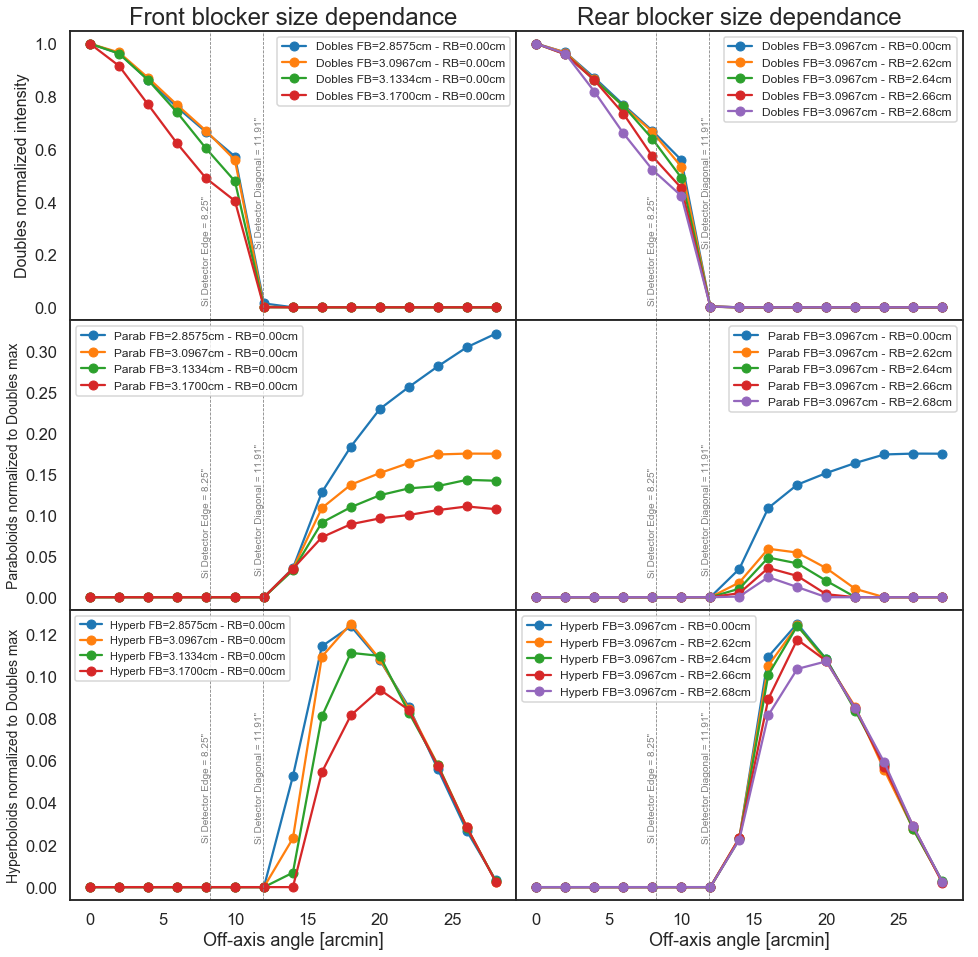

In [18]:
## Figure definition:
f, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, sharex='col', sharey='row',figsize=(16,16))

## Front Blocker Doubles
ax1.set_title('Front blocker size dependance',fontsize=24)
ax1.plot(offaxisAngles, F286_NR_Doubles/max(np.array(F286_NR_Doubles)),'o-',label='Dobles FB=2.8575cm - RB=0.00cm')
ax1.plot(offaxisAngles, F309_NR_Doubles/max(np.array(F309_NR_Doubles)),'o-',label='Dobles FB=3.0967cm - RB=0.00cm')
ax1.plot(offaxisAngles, F313_NR_Doubles/max(np.array(F313_NR_Doubles)),'o-',label='Dobles FB=3.1334cm - RB=0.00cm')
ax1.plot(offaxisAngles, F317_NR_Doubles/max(np.array(F317_NR_Doubles)),'o-',label='Dobles FB=3.1700cm - RB=0.00cm')
ax1.set_ylabel('Doubles normalized intensity',fontsize=16)
ax1.axvline(8.25,color='Grey',linestyle='--',lw=0.8)
ax1.text(7.7,0.4,'Si Detector Edge = 8.25"',rotation=90,fontsize=10,color='Grey')
ax1.axvline(11.91,color='Grey',linestyle='--',lw=0.8)
ax1.text(11.4,0.7,'Si Detector Diagonal = 11.91"',rotation=90,fontsize=10,color='Grey')

## Front Blocker Paraboloids
ax3.plot(offaxisAngles, F286_NR_Par/max(np.array(F286_NR_Doubles)),'o-',label='Parab FB=2.8575cm - RB=0.00cm')
ax3.plot(offaxisAngles, F309_NR_Par/max(np.array(F309_NR_Doubles)),'o-',label='Parab FB=3.0967cm - RB=0.00cm')
ax3.plot(offaxisAngles, F313_NR_Par/max(np.array(F313_NR_Doubles)),'o-',label='Parab FB=3.1334cm - RB=0.00cm')
ax3.plot(offaxisAngles, F317_NR_Par/max(np.array(F317_NR_Doubles)),'o-',label='Parab FB=3.1700cm - RB=0.00cm')
ax3.set_ylabel('Paraboloids normalized to Doubles max',fontsize=14)
ax3.axvline(8.25,color='Grey',linestyle='--',lw=0.8)
ax3.text(7.7,0.15,'Si Detector Edge = 8.25"',rotation=90,fontsize=10,color='Grey')
ax3.axvline(11.91,color='Grey',linestyle='--',lw=0.8)
ax3.text(11.4,0.18,'Si Detector Diagonal = 11.91"',rotation=90,fontsize=10,color='Grey')

## Front Blocker Hyperboloids
ax5.plot(offaxisAngles, F286_NR_Hyp/max(np.array(F286_NR_Doubles)),'o-',label='Hyperb FB=2.8575cm - RB=0.00cm')
ax5.plot(offaxisAngles, F309_NR_Hyp/max(np.array(F309_NR_Doubles)),'o-',label='Hyperb FB=3.0967cm - RB=0.00cm')
ax5.plot(offaxisAngles, F313_NR_Hyp/max(np.array(F313_NR_Doubles)),'o-',label='Hyperb FB=3.1334cm - RB=0.00cm')
ax5.plot(offaxisAngles, F317_NR_Hyp/max(np.array(F317_NR_Doubles)),'o-',label='Hyperb FB=3.1700cm - RB=0.00cm')
ax5.set_xlabel('Off-axis angle [arcmin]',fontsize=18)
ax5.set_ylabel('Hyperboloids normalized to Doubles max',fontsize=14)
ax5.axvline(8.25,color='Grey',linestyle='--',lw=0.8)
ax5.text(7.7,0.07,'Si Detector Edge = 8.25"',rotation=90,fontsize=10,color='Grey')
ax5.axvline(11.91,color='Grey',linestyle='--',lw=0.8)
ax5.text(11.4,0.08,'Si Detector Diagonal = 11.91"',rotation=90,fontsize=10,color='Grey')

## Rear Blocker Doubles
ax2.set_title('Rear blocker size dependance',fontsize=24)
ax2.plot(offaxisAngles, F309_NR_Doubles/max(np.array(F309_NR_Doubles)),'o-',label='Dobles FB=3.0967cm - RB=0.00cm')
ax2.plot(offaxisAngles, F309_R262_Doubles/max(np.array(F309_R262_Doubles)),'o-',label='Dobles FB=3.0967cm - RB=2.62cm')
ax2.plot(offaxisAngles, F309_R264_Doubles/max(np.array(F309_R264_Doubles)),'o-',label='Dobles FB=3.0967cm - RB=2.64cm')
ax2.plot(offaxisAngles, F309_R266_Doubles/max(np.array(F309_R266_Doubles)),'o-',label='Dobles FB=3.0967cm - RB=2.66cm')
ax2.plot(offaxisAngles, F309_R268_Doubles/max(np.array(F309_R268_Doubles)),'o-',label='Dobles FB=3.0967cm - RB=2.68cm')
ax2.axvline(8.25,color='Grey',linestyle='--',lw=0.8)
ax2.text(7.7,0.4,'Si Detector Edge = 8.25"',rotation=90,fontsize=10,color='Grey')
ax2.axvline(11.91,color='Grey',linestyle='--',lw=0.8)
ax2.text(11.4,0.7,'Si Detector Diagonal = 11.91"',rotation=90,fontsize=10,color='Grey')

## Rear Blocker Paraboloids
ax4.plot(offaxisAngles, F309_NR_Par/max(np.array(F309_NR_Doubles)),'o-',label='Parab FB=3.0967cm - RB=0.00cm')
ax4.plot(offaxisAngles, F309_R262_Par/max(np.array(F309_R262_Doubles)),'o-',label='Parab FB=3.0967cm - RB=2.62cm')
ax4.plot(offaxisAngles, F309_R264_Par/max(np.array(F309_R264_Doubles)),'o-',label='Parab FB=3.0967cm - RB=2.64cm')
ax4.plot(offaxisAngles, F309_R266_Par/max(np.array(F309_R266_Doubles)),'o-',label='Parab FB=3.0967cm - RB=2.66cm')
ax4.plot(offaxisAngles, F309_R268_Par/max(np.array(F309_R268_Doubles)),'o-',label='Parab FB=3.0967cm - RB=2.68cm')
ax4.axvline(8.25,color='Grey',linestyle='--',lw=0.8)
ax4.text(7.7,0.15,'Si Detector Edge = 8.25"',rotation=90,fontsize=10,color='Grey')
ax4.axvline(11.91,color='Grey',linestyle='--',lw=0.8)
ax4.text(11.4,0.18,'Si Detector Diagonal = 11.91"',rotation=90,fontsize=10,color='Grey')

## Rear Blocker Hyperboloids
ax6.plot(offaxisAngles, F309_NR_Hyp/max(np.array(F309_NR_Doubles)),'o-',label='Hyperb FB=3.0967cm - RB=0.00cm')
ax6.plot(offaxisAngles, F309_R262_Hyp/max(np.array(F309_R262_Doubles)),'o-',label='Hyperb FB=3.0967cm - RB=2.62cm')
ax6.plot(offaxisAngles, F309_R264_Hyp/max(np.array(F309_R264_Doubles)),'o-',label='Hyperb FB=3.0967cm - RB=2.64cm')
ax6.plot(offaxisAngles, F309_R266_Hyp/max(np.array(F309_R266_Doubles)),'o-',label='Hyperb FB=3.0967cm - RB=2.66cm')
ax6.plot(offaxisAngles, F309_R268_Hyp/max(np.array(F309_R268_Doubles)),'o-',label='Hyperb FB=3.0967cm - RB=2.68cm')
ax6.axvline(8.25,color='Grey',linestyle='--',lw=0.8)
ax6.text(7.7,0.07,'Si Detector Edge = 8.25"',rotation=90,fontsize=10,color='Grey')
ax6.axvline(11.91,color='Grey',linestyle='--',lw=0.8)
ax6.text(11.4,0.08,'Si Detector Diagonal = 11.91"',rotation=90,fontsize=10,color='Grey')
ax6.set_xlabel('Off-axis angle [arcmin]',fontsize=18)

f.subplots_adjust(hspace=0,wspace=0)
ax1.legend(fontsize=12); ax3.legend(fontsize=12); ax5.legend(fontsize=11)
ax2.legend(fontsize=12); ax4.legend(fontsize=12); ax6.legend(fontsize=12);



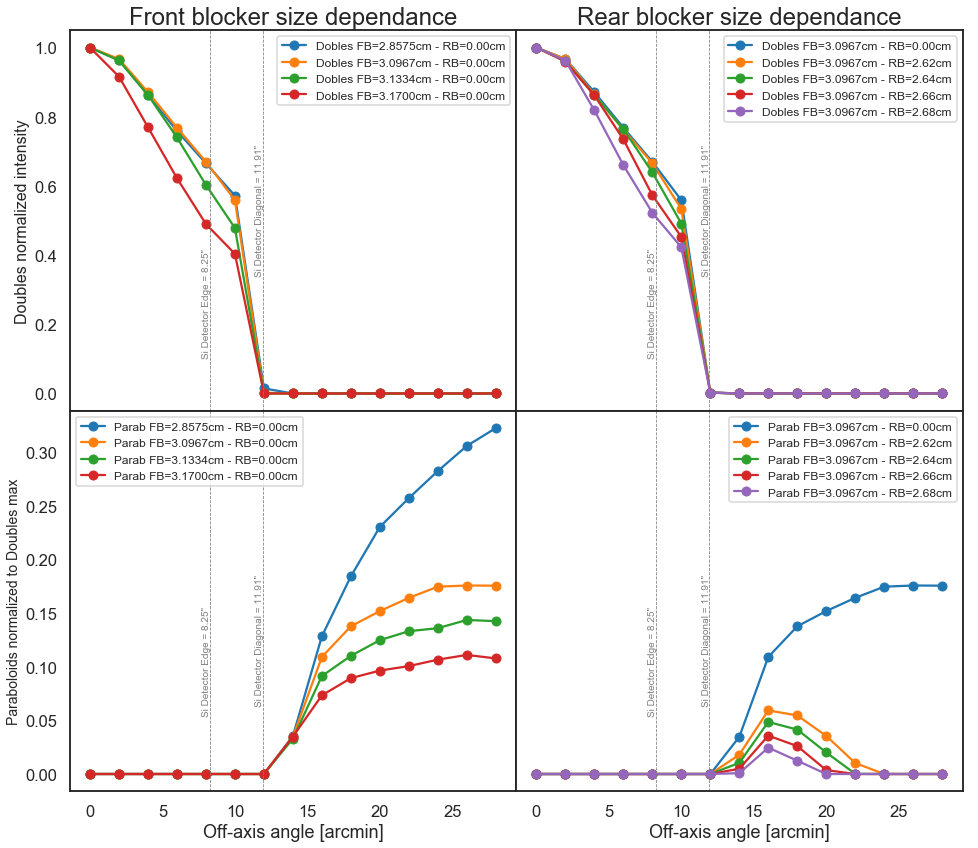

In [30]:
## Figure definition:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row',figsize=(16,14))

## Front Blocker Doubles
ax1.set_title('Front blocker size dependance',fontsize=24)
ax1.plot(offaxisAngles, F286_NR_Doubles/max(np.array(F286_NR_Doubles)),'o-',label='Dobles FB=2.8575cm - RB=0.00cm')
ax1.plot(offaxisAngles, F309_NR_Doubles/max(np.array(F309_NR_Doubles)),'o-',label='Dobles FB=3.0967cm - RB=0.00cm')
ax1.plot(offaxisAngles, F313_NR_Doubles/max(np.array(F313_NR_Doubles)),'o-',label='Dobles FB=3.1334cm - RB=0.00cm')
ax1.plot(offaxisAngles, F317_NR_Doubles/max(np.array(F317_NR_Doubles)),'o-',label='Dobles FB=3.1700cm - RB=0.00cm')
ax1.set_ylabel('Doubles normalized intensity',fontsize=16)
ax1.axvline(8.25,color='Grey',linestyle='--',lw=0.8)
ax1.text(7.7,0.4,'Si Detector Edge = 8.25"',rotation=90,fontsize=10,color='Grey')
ax1.axvline(11.91,color='Grey',linestyle='--',lw=0.8)
ax1.text(11.4,0.7,'Si Detector Diagonal = 11.91"',rotation=90,fontsize=10,color='Grey')

## Front Blocker Paraboloids
ax3.plot(offaxisAngles, F286_NR_Par/max(np.array(F286_NR_Doubles)),'o-',label='Parab FB=2.8575cm - RB=0.00cm')
ax3.plot(offaxisAngles, F309_NR_Par/max(np.array(F309_NR_Doubles)),'o-',label='Parab FB=3.0967cm - RB=0.00cm')
ax3.plot(offaxisAngles, F313_NR_Par/max(np.array(F313_NR_Doubles)),'o-',label='Parab FB=3.1334cm - RB=0.00cm')
ax3.plot(offaxisAngles, F317_NR_Par/max(np.array(F317_NR_Doubles)),'o-',label='Parab FB=3.1700cm - RB=0.00cm')
ax3.set_ylabel('Paraboloids normalized to Doubles max',fontsize=14)
ax3.axvline(8.25,color='Grey',linestyle='--',lw=0.8)
ax3.text(7.7,0.15,'Si Detector Edge = 8.25"',rotation=90,fontsize=10,color='Grey')
ax3.axvline(11.91,color='Grey',linestyle='--',lw=0.8)
ax3.text(11.4,0.18,'Si Detector Diagonal = 11.91"',rotation=90,fontsize=10,color='Grey')
ax3.set_xlabel('Off-axis angle [arcmin]',fontsize=18)

## Rear Blocker Doubles
ax2.set_title('Rear blocker size dependance',fontsize=24)
ax2.plot(offaxisAngles, F309_NR_Doubles/max(np.array(F309_NR_Doubles)),'o-',label='Dobles FB=3.0967cm - RB=0.00cm')
ax2.plot(offaxisAngles, F309_R262_Doubles/max(np.array(F309_R262_Doubles)),'o-',label='Dobles FB=3.0967cm - RB=2.62cm')
ax2.plot(offaxisAngles, F309_R264_Doubles/max(np.array(F309_R264_Doubles)),'o-',label='Dobles FB=3.0967cm - RB=2.64cm')
ax2.plot(offaxisAngles, F309_R266_Doubles/max(np.array(F309_R266_Doubles)),'o-',label='Dobles FB=3.0967cm - RB=2.66cm')
ax2.plot(offaxisAngles, F309_R268_Doubles/max(np.array(F309_R268_Doubles)),'o-',label='Dobles FB=3.0967cm - RB=2.68cm')
ax2.axvline(8.25,color='Grey',linestyle='--',lw=0.8)
ax2.text(7.7,0.4,'Si Detector Edge = 8.25"',rotation=90,fontsize=10,color='Grey')
ax2.axvline(11.91,color='Grey',linestyle='--',lw=0.8)
ax2.text(11.4,0.7,'Si Detector Diagonal = 11.91"',rotation=90,fontsize=10,color='Grey')

## Rear Blocker Paraboloids
ax4.plot(offaxisAngles, F309_NR_Par/max(np.array(F309_NR_Doubles)),'o-',label='Parab FB=3.0967cm - RB=0.00cm')
ax4.plot(offaxisAngles, F309_R262_Par/max(np.array(F309_R262_Doubles)),'o-',label='Parab FB=3.0967cm - RB=2.62cm')
ax4.plot(offaxisAngles, F309_R264_Par/max(np.array(F309_R264_Doubles)),'o-',label='Parab FB=3.0967cm - RB=2.64cm')
ax4.plot(offaxisAngles, F309_R266_Par/max(np.array(F309_R266_Doubles)),'o-',label='Parab FB=3.0967cm - RB=2.66cm')
ax4.plot(offaxisAngles, F309_R268_Par/max(np.array(F309_R268_Doubles)),'o-',label='Parab FB=3.0967cm - RB=2.68cm')
ax4.axvline(8.25,color='Grey',linestyle='--',lw=0.8)
ax4.text(7.7,0.15,'Si Detector Edge = 8.25"',rotation=90,fontsize=10,color='Grey')
ax4.axvline(11.91,color='Grey',linestyle='--',lw=0.8)
ax4.text(11.4,0.18,'Si Detector Diagonal = 11.91"',rotation=90,fontsize=10,color='Grey')
ax4.set_xlabel('Off-axis angle [arcmin]',fontsize=18)

f.subplots_adjust(hspace=0,wspace=0)
ax1.legend(fontsize=12); ax3.legend(fontsize=12);
ax2.legend(fontsize=12); ax4.legend(fontsize=12);

